In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Параметры отображения графиков:
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams.update({'font.size': 11})

In [4]:
# Загрузка данных:
data = pd.read_csv('suicides_data.csv')

In [5]:
# Количество строк и столбцов:
data.shape

(27820, 12)

In [6]:
# Общий вид данных:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
# Типы данных:
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [8]:
# Количество пропусков по столбцам:
data.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [9]:
# Убираем пробелы и лишние символы в заголовках столбцов:
data.columns = data.columns.str.replace(' ', '').str.replace('$', '').str.replace('\(\)', '')

In [10]:
# Преобразуем данные столбца с ВВП в числовые значения:
data['gdp_for_year'] = data['gdp_for_year'].str.replace(',', '')
data['gdp_for_year'] = pd.to_numeric(data['gdp_for_year'], errors='coerce')

In [11]:
# Сводная таблица:
data.describe()

,year,suicides_no,population,suicides/100kpop,HDIforyear,gdp_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


Из сводной таблицы статистических показателей видно, что по большинству числовых параметров средние значения значительно превышают медианные значения. Это означает, что данные распределены неравномерно, максимальные значения встречаются в единичных странах, в то время как более значительная часть выборки представлена средними значениями и ниже среднего. Исключение составляет параметр HDIforyear (Human Development Index), для которого среднее значение достаточно близко к медиане.

In [12]:
# Список столбцов с числовыми данными:
num_cols = [col for col in data.columns if np.issubdtype(data.dtypes[col], np.number)]

In [13]:
# Матрица корреляции:
correlation = data[num_cols].corr()

Text(0.5, 1, 'Матрица корреляции')

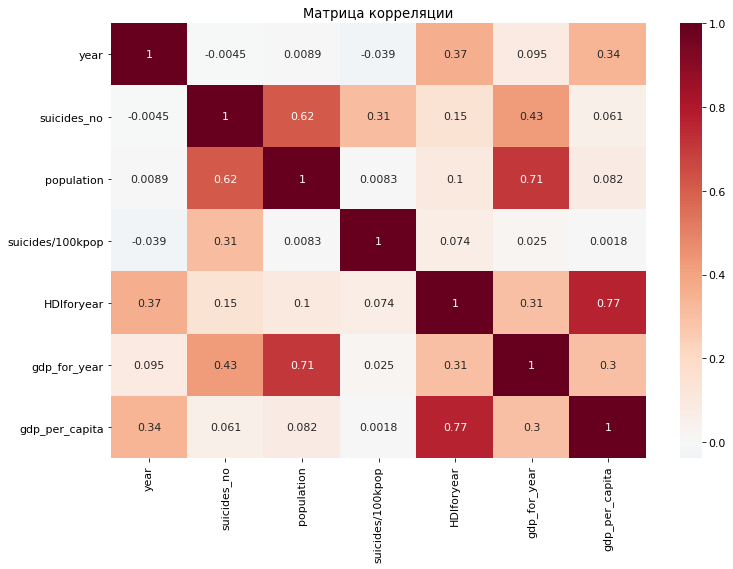

In [14]:
# Визуализация матрицы корреляции:
ax = sns.heatmap(correlation, center=0, annot=True, cmap='RdBu_r')
l, r = ax.get_ylim()
ax.set_ylim(l + 0.5, r - 0.5)
plt.yticks(rotation=0)
plt.title('Матрица корреляции')

Из полученной матрицы корреляции можно сделать следующие выводы:
- Общее количество самоубийств наиболее явно коррелирует с численностью населения (0.62) и в несколько меньшей степени с покзателем ВВП (0.43).
- Уровень самоубийств на 100 тыс. жителей слабо коррелирует с другими показателями, наиболее высокий уровень корреляции (0.31) наблюдается только с общим количеством самоубийств.

Text(0.5, 0.98, 'Распределение значений параметров')

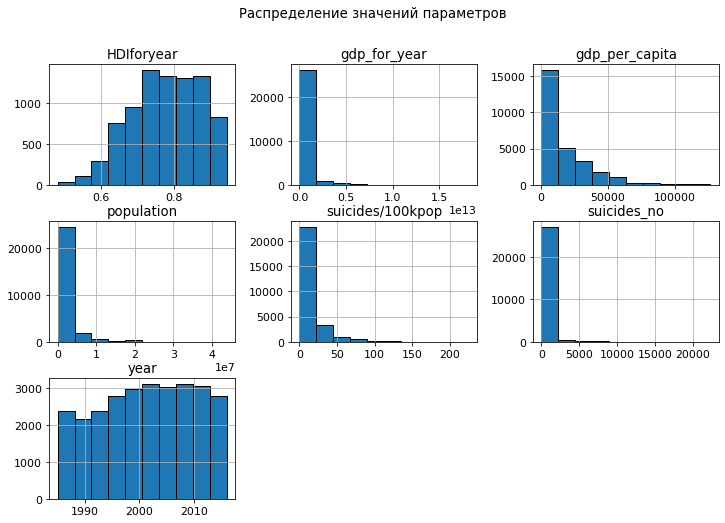

In [15]:
# Распределение числовых параметров:
data[num_cols].hist(bins=10, edgecolor='black')
plt.suptitle('Распределение значений параметров')

Гистограммы показывают, что для большинства числовых параметров характерно экспоненциальное распределение, т.е. гистограммы сильно смещены в сторону минимальных значений. Гистограмма параметра HDI наиболее близка по форме к нормальному распределению.

In [16]:
# Группируем данные по возрастным группам и вычисляем для каждой группы
# общее количество самоубийств и численность населения, число самоубийств
# на 100 тыс. жителей:
age_data = data.groupby(by='age')[['suicides_no', 'population']].sum().reset_index()
age_data['suicides/100kpop'] = age_data['suicides_no'] / age_data['population'] * 100_000
age_data

,age,suicides_no,population,suicides/100kpop
0,15-24 years,808542,8642946896,9.354934
1,25-34 years,1123912,8438103587,13.319486
2,35-54 years,2452141,14375888123,17.057318
3,5-14 years,52264,8398693237,0.622287
4,55-74 years,1658443,8803245340,18.838996
5,75+ years,653118,2663281253,24.523058


In [17]:
# Для удобства восприятия перемещаем строку с индексом 3 наверх:
age_data = age_data.reindex([3, 0, 1, 2, 4, 5])
age_data

,age,suicides_no,population,suicides/100kpop
3,5-14 years,52264,8398693237,0.622287
0,15-24 years,808542,8642946896,9.354934
1,25-34 years,1123912,8438103587,13.319486
2,35-54 years,2452141,14375888123,17.057318
4,55-74 years,1658443,8803245340,18.838996
5,75+ years,653118,2663281253,24.523058


Text(0.5, 1.0, 'Число самоубийств на 100 тыс. жителей')

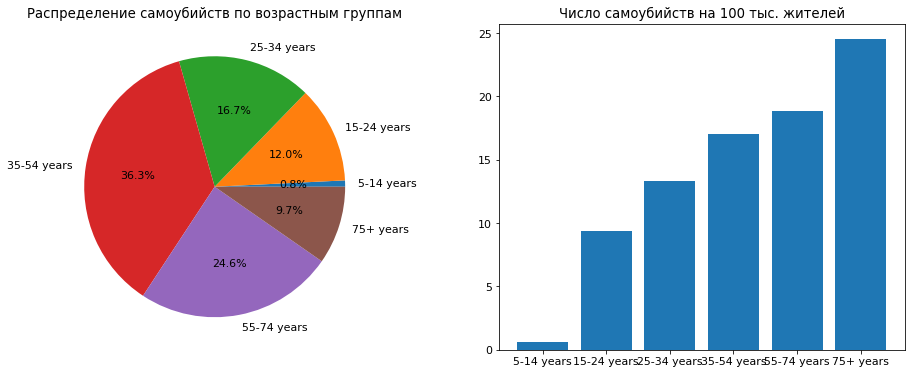

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.pie(age_data['suicides_no'], labels=age_data['age'], autopct='%1.1f%%')
ax1.set_title('Распределение самоубийств по возрастным группам')
ax2.bar(age_data['age'], age_data['suicides/100kpop'])
ax2.set_title('Число самоубийств на 100 тыс. жителей')

Из графиков видно, что в разрезе абсолютного количества самоубийств наиболее широко представлены возрастные группы 35-54 года и 55-74 года. В то же время количество самоубийств на 100 тыс. человек демонстрирует устойчивый тренд на увеличение по мере увеличения возраста. Это связано с тем, что по мере старения доля населения соответствующих возрастных групп в общей структуре населения уменьшается, в то время как склонность к суициду, напротив, возрастает. В связи с этим наблюдается представленная выше, на первый взгляд, не вполне логичная структура.

Text(0.5, 1.0, 'Распределение населения по возрастным группам')

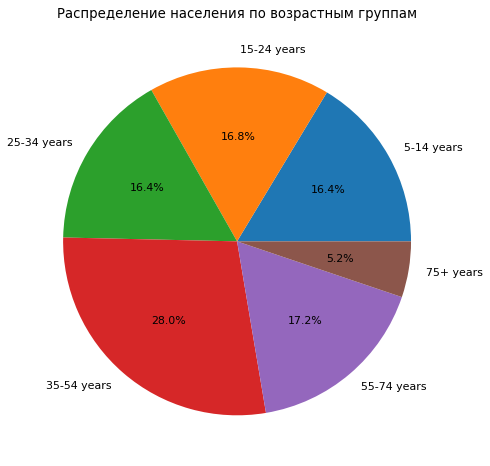

In [19]:
plt.pie(age_data['population'], labels=age_data['age'], autopct='%1.1f%%')
plt.title('Распределение населения по возрастным группам')

В возрастной структуре населения наиболее широко представлена группа 35-54 года. На эту же группу приходится наибольшее количество самоубийств в абсолютном выражении. Можно говорить о том, что риск суицида становится значимым фактором при достижении 15 лет и далее увеличивается с возрастом.

In [20]:
# Группируем данные по полу:
gender_data = data.groupby(by='sex')[['suicides_no', 'population']].sum().reset_index()
gender_data['suicides/100kpop'] = gender_data['suicides_no'] / gender_data['population'] * 100_000
gender_data

,sex,suicides_no,population,suicides/100kpop
0,female,1559510,26272781857,5.935839
1,male,5188910,25049376579,20.714727


Text(0.5, 1.0, 'Число самоубийств на 100 тыс. жителей')

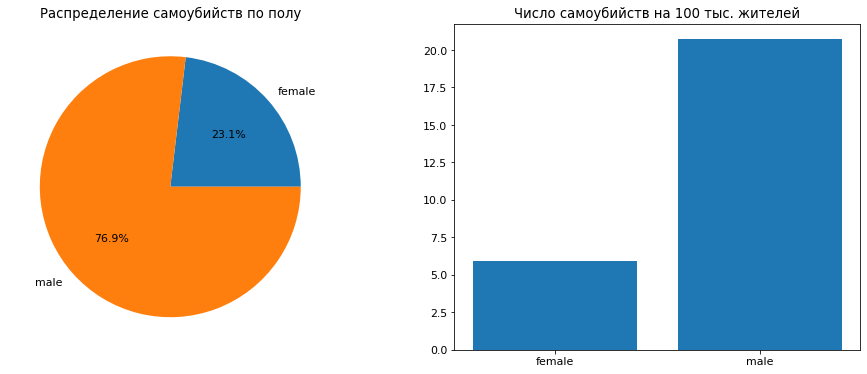

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.pie(gender_data['suicides_no'], labels=gender_data['sex'], autopct='%1.1f%%')
ax1.set_title('Распределение самоубийств по полу')
ax2.bar(gender_data['sex'], gender_data['suicides/100kpop'])
ax2.set_title('Число самоубийств на 100 тыс. жителей')

Как видно из графиков выше, женщины в значительно меньшей степени склонны к суициду, по сравнению с мужчинами. Это подтверждается и абсолютными, и относительными показателями. Для уточнения проверим гендерную структуру населения в целом:

Text(0.5, 1.0, 'Распределение населения по полу')

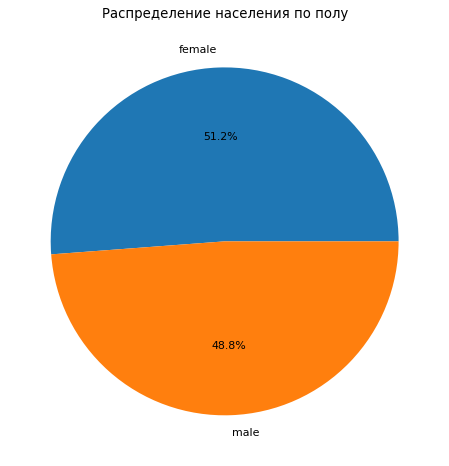

In [22]:
plt.pie(gender_data['population'], labels=gender_data['sex'], autopct='%1.1f%%')
plt.title('Распределение населения по полу')

В общей структуре населения доля женщин незначительно превышает долю мужчин. Но при этом женщины почти в четыре раза реже, чем мужчины, совершают самоубийства (в среднем 5.9 случаев на 100 тыс. человек против 20.7 случаев у мужчин).

In [23]:
# Группируем данные по поколениям:
generation_data = data.groupby(by='generation')[['suicides_no', 'population']].sum().reset_index()
generation_data['suicides/100kpop'] = generation_data['suicides_no'] / generation_data['population'] * 100_000
generation_data

,generation,suicides_no,population,suicides/100kpop
0,Boomers,2284498,13350511729,17.111689
1,G.I. Generation,510009,2126202724,23.986847
2,Generation X,1532804,13472109292,11.377610
3,Generation Z,15906,2503541842,0.635340
4,Millenials,623459,10649461202,5.854371
5,Silent,1781744,9220331647,19.324077


In [24]:
# Для удобства восприятия сортируем данные по среднему числу самоубийств на 100 тыс. жителей:
generation_data = generation_data.sort_values(by='suicides/100kpop')

Text(0.5, 1.0, 'Число самоубийств на 100 тыс. жителей')

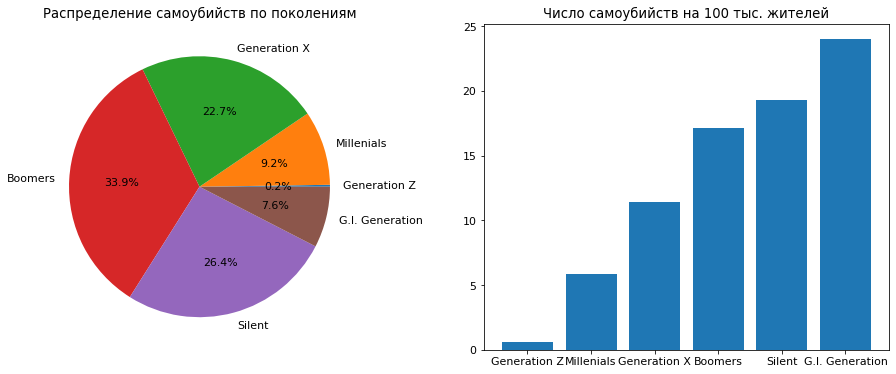

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.pie(generation_data['suicides_no'], labels=generation_data['generation'], autopct='%1.1f%%')
ax1.set_title('Распределение самоубийств по поколениям')
ax2.bar(generation_data['generation'], generation_data['suicides/100kpop'])
ax2.set_title('Число самоубийств на 100 тыс. жителей')

Анализ данных по суицидам в разрезе поколений показывает те же закономерности, что и анализ возрастных групп. Чем старше поколенческая группа, тем выше склонность к суициду. При этом наиболее значительный вклад в абсолютные показатели вносят поколения, которые можно отнести к средней возрастной группе и выше среднего. Наибольшее абсолютное количество самоубийств приходится на бумеров, "молчунов" и поколение Х, наименьшее - на сравнительно молодые по возрасту и, наоборот, пожилые группы.

Text(0.5, 1.0, 'Распределение населения по поколениям')

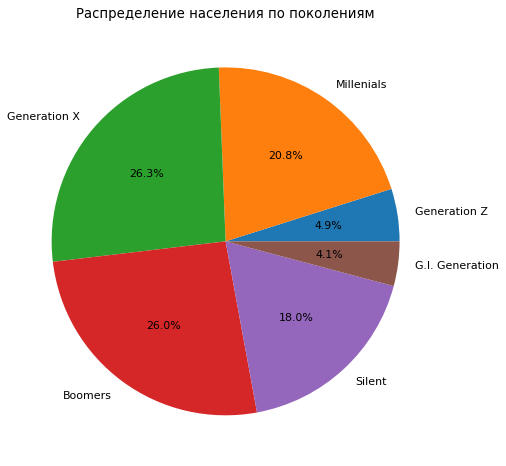

In [26]:
plt.pie(generation_data['population'], labels=generation_data['generation'], autopct='%1.1f%%')
plt.title('Распределение населения по поколениям')

In [27]:
# Группируем данные по годам:
yearly_data = data.groupby(by='year')[['suicides_no', 'population']].sum().reset_index()
yearly_data['suicides/100kpop'] = yearly_data['suicides_no'] / yearly_data['population'] * 100_000

Text(0.5, 1.0, 'Динамика общего числа самоубийств')

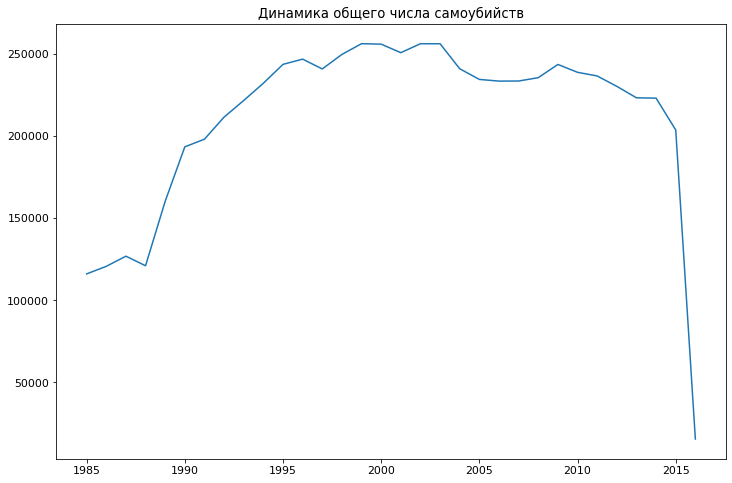

In [28]:
plt.plot(yearly_data['year'], yearly_data['suicides_no'])
plt.title('Динамика общего числа самоубийств')

Резкий нетипичный спад показателя в конце временного ряда, на первый взгляд, может быть связан с тем, что в выборке представлены неполные данные за 2016 год. Однако это может быть связано и с тем, что в выборке по каким-то причинам уменьшилась общая численность населения (именно между численностью населения и общим числом самоубийств наблюдается наиболее устойчивая корреляция). Проверяем эту гипотезу:

Text(0.5, 1.0, 'Динамика общего числа самоубийств')

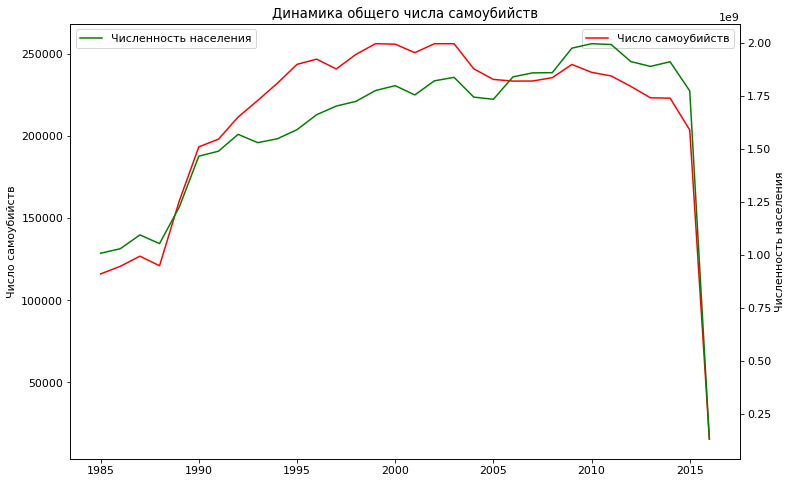

In [29]:
fig, ax  = plt.subplots()

ax1 = ax
ax2 = ax.twinx()

ax1.plot(yearly_data['year'], yearly_data['suicides_no'], color='red', label='Число самоубийств')
ax2.plot(yearly_data['year'], yearly_data['population'], color='green', label='Численность населения')
ax1.legend()
ax2.legend()
ax1.set_ylabel('Число самоубийств')
ax2.set_ylabel('Численность населения')
ax2.set_title('Динамика общего числа самоубийств')

График подтверждает, что в период с 1985 по 2016 год в выборке существенно менялась общая численность населения, что отражалось в динамике общего количества самоубийств, поскольку эти параметры взаимосвязаны.

Text(0.5, 1.0, 'Число самоубийств на 100 тыс. жителей')

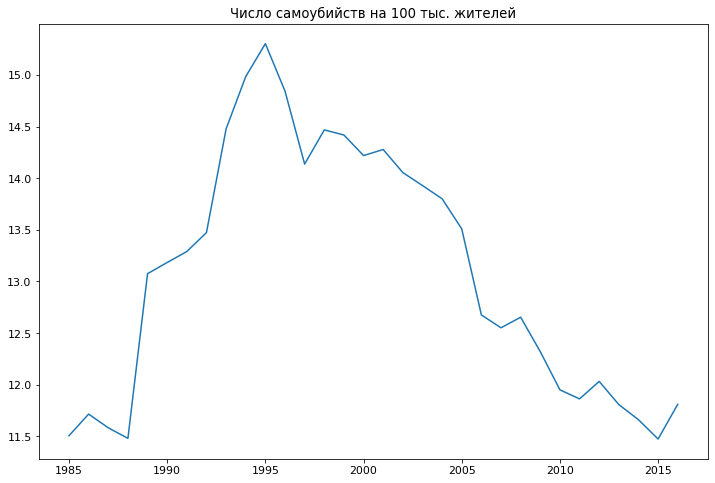

In [30]:
plt.plot(yearly_data['year'], yearly_data['suicides/100kpop'])
plt.title('Число самоубийств на 100 тыс. жителей')

Более интересен в хронологическом разрезе анализ показателя самоубийств на 100 тыс. человек населения. Здесь наблюдается устойчивый рост в период с конца 1980-х до середины 1990-х годов, после чего этот показатель преимущественно снижался вплоть до 2015 года. С 2016 года наметился очередной этап роста. Доступный для анализа временной отрезок не позволяет делать однозначных выводов, но можно предположить, что динамика числа самоубийств на 100 тыс. жителей связана с фактором смены поколений и должна иметь вид примерно 20-летних циклов. В 1990-х годах бумеры (самое многочисленное из рассматриваемых поколений) перешли в возрастную категорию 35-54 года, что и привело к росту рассматриваемого показателя до пиковых значений. Дальнейший спад связан с тем, что следующие поколения были менее многочисленными, т.к. рождаемость в большинстве стран Запада снижалась. Связь самоубийств с экономическими циклами на основе имеющихся данных не подтверждается, поскольку крупные экономические кризисы возникают примерно каждые 10 лет. В частности, на графике отсутствует признаки роста уровня самоубийств в период с 2008-го года (глобальный финансовый кризис).

In [31]:
# Вычислим средний показатель ВВП на душу населения для всех стран рассматриваемой выборки по годам:
GDP_data = data.drop_duplicates(subset=['country', 'year'])
GDP_data = data.groupby(by='year')['gdp_for_year'].sum().reset_index()
GDP_data['gdp_per_capita'] = GDP_data['gdp_for_year'] / yearly_data['population']

Text(0.5, 1.0, 'Динамика самоубийств и ВВП')

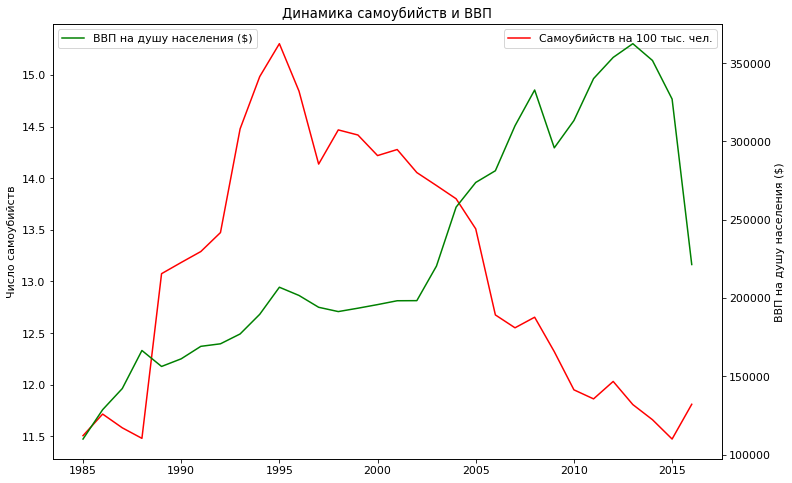

In [32]:
fig, ax  = plt.subplots()

ax1 = ax
ax2 = ax.twinx()

ax1.plot(yearly_data['year'], yearly_data['suicides/100kpop'], color='red', label='Самоубийств на 100 тыс. чел.')
ax2.plot(GDP_data['year'], GDP_data['gdp_per_capita'], color='green', label='ВВП на душу населения ($)')
ax1.legend()
ax2.legend()
ax1.set_ylabel('Число самоубийств')
ax2.set_ylabel('ВВП на душу населения ($)')
ax2.set_title('Динамика самоубийств и ВВП')

График подтверждает отсутствие непосредственной зависимости между уровнем благосостояния, отраженном в показателе ВВП на душу населения, и количеством самойбийств на 100 тыс. жителей. Динамика показателя ВВП на душу населения демонстрирует зависимость от экономических циклов и кризисов (спады наблюдаются примерно каждые 10 лет). В период с 2014 года наблюдается тенденция устойчивого снижения показателя ВВП на душу населения, чего не было в предшествующие периоды. Для уточнения причин этого тренда проанализируем состав стран, представленных в выборке по годам.

In [33]:
# Перечень и количество стран в выборке по годам:
countries_data = data.groupby(by='year')['country'].unique().reset_index()
countries_data['n_countries'] = countries_data['country'].apply(lambda x: len(x))
countries_data

,year,country,n_countries
0,1985,"[Antigua and Barbuda, Argentina, Australia, Au...",48
1,1986,"[Antigua and Barbuda, Argentina, Australia, Au...",48
2,1987,"[Albania, Antigua and Barbuda, Argentina, Aust...",54
3,1988,"[Albania, Antigua and Barbuda, Argentina, Aust...",49
4,1989,"[Albania, Antigua and Barbuda, Argentina, Aust...",52
5,1990,"[Antigua and Barbuda, Argentina, Armenia, Aust...",64
6,1991,"[Antigua and Barbuda, Argentina, Armenia, Aust...",64
7,1992,"[Albania, Antigua and Barbuda, Argentina, Arme...",65
8,1993,"[Albania, Antigua and Barbuda, Argentina, Arme...",65
9,1994,"[Albania, Antigua and Barbuda, Argentina, Arme...",68


Text(0.5, 1.0, 'Количество стран в выборке')

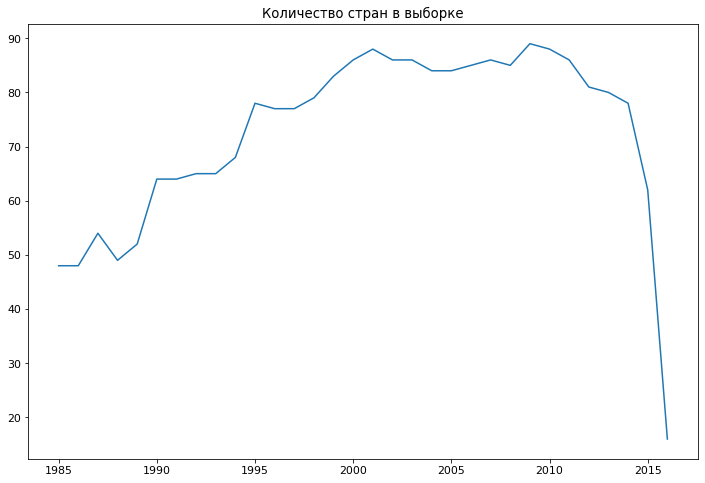

In [34]:
plt.plot(countries_data['year'], countries_data['n_countries'])
plt.title('Количество стран в выборке')

Из графика видно, что с 2014 года количество стран-участников статистической выборки начало резко сокращаться.

In [35]:
# Перечень стран, оставшихся в выборке на 2016 год:
for country in countries_data.at[31, 'country']:
    print(country)

Armenia
Austria
Croatia
Cyprus
Czech Republic
Grenada
Hungary
Iceland
Lithuania
Mauritius
Mongolia
Netherlands
Qatar
Romania
Sweden
Thailand


In [36]:
# Перечень стран на 2009 год (наиболее репрезентативная выборка за весь период):
for country in countries_data.at[24, 'country']:
    print(country)

Albania
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Bahamas
Bahrain
Barbados
Belarus
Belgium
Belize
Brazil
Bulgaria
Canada
Chile
Colombia
Costa Rica
Croatia
Cuba
Cyprus
Czech Republic
Denmark
Ecuador
El Salvador
Estonia
Fiji
Finland
France
Georgia
Germany
Greece
Grenada
Guatemala
Guyana
Hungary
Iceland
Ireland
Israel
Italy
Jamaica
Japan
Kazakhstan
Kuwait
Kyrgyzstan
Latvia
Lithuania
Luxembourg
Malta
Mauritius
Mexico
Montenegro
Netherlands
New Zealand
Norway
Oman
Panama
Paraguay
Philippines
Poland
Portugal
Puerto Rico
Qatar
Republic of Korea
Romania
Russian Federation
Saint Lucia
Saint Vincent and Grenadines
Serbia
Seychelles
Singapore
Slovakia
Slovenia
South Africa
Spain
Suriname
Sweden
Switzerland
Thailand
Trinidad and Tobago
Turkey
Turkmenistan
Ukraine
United Arab Emirates
United Kingdom
United States
Uruguay
Uzbekistan


Помимо значительного сокращения количества стран, предоставляющих статистические данные, произошло изменение их структуры: из выборки ушли страны с наиболее высокими экономическими показателями (США, Канада, Япония, значительная часть стран Западной Европы). Поэтому показатель среднедушевого ВВП показывает такой резкий спад с 2014 года.

In [37]:
# Проанализируем зависимость уровня самоубийств от среднедушевого ВВП по странам за 2009 год:
data_2009 = data[data['year'] == 2009]
data_2009 = data_2009.groupby(by='country').agg({'suicides_no': 'sum', 'population': 'sum', 'gdp_per_capita': 'max'})
data_2009['suicides/100kpop'] = data_2009['suicides_no'] / data_2009['population'] * 100_000

Text(0.5, 1.0, 'Зависимость уровня самоубийств от ВВП по странам за 2009 год')

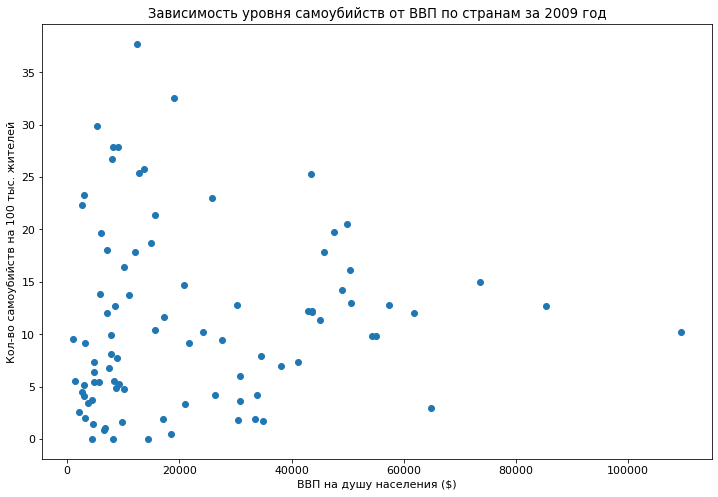

In [38]:
plt.scatter(data_2009['gdp_per_capita'], data_2009['suicides/100kpop'])
plt.xlabel('ВВП на душу населения ($)')
plt.ylabel('Кол-во самоубийств на 100 тыс. жителей')
plt.title('Зависимость уровня самоубийств от ВВП по странам за 2009 год')

В странах с высоким среднедушевым ВВП уровень самоубийств на 100 тыс. жителей, как правило, не превышает средних значений. Однако количество таких стран ограничено. В странах с низким и средним уровнем ВВП явная зависимость между показателями не просматривается.

In [39]:
# Периоды, за которые в выборке есть информаци о HDI:
data[~data['HDIforyear'].isna()]['year'].unique()

array([1995, 2000, 2005, 2010, 2012, 2013, 2014, 1985, 1990, 2011],
      dtype=int64)

In [40]:
# Проанализируем зависимость уровня самоубийств от HDI по странам за 2010 год:
data_2010 = data[data['year'] == 2010]
data_2010 = data_2010.groupby(by='country').agg({'suicides_no': 'sum', 'population': 'sum', 'HDIforyear': 'max'})
data_2010['suicides/100kpop'] = data_2010['suicides_no'] / data_2010['population'] * 100_000

Text(0.5, 1.0, 'Зависимость уровня самоубийств от HDI по странам за 2010 год')

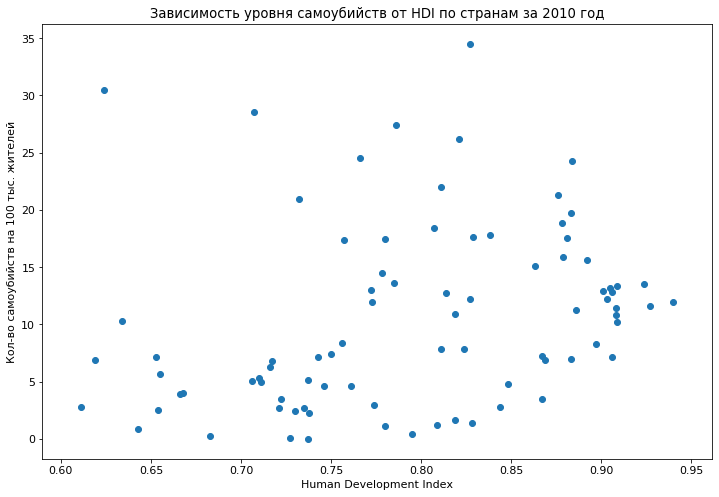

In [41]:
plt.scatter(data_2010['HDIforyear'], data_2010['suicides/100kpop'])
plt.xlabel('Human Development Index')
plt.ylabel('Кол-во самоубийств на 100 тыс. жителей')
plt.title('Зависимость уровня самоубийств от HDI по странам за 2010 год')

Устойчивая корреляция между параметрами на графике не прослеживается. С некоторой осторожностью можно даже говорить о том, что для части выборки с увеличением HDI уровень самоубийств на 100 тыс. жителей незначительно возрастает. Это может быть связано с тем, что высокие индексы характерны для западных стран с более значительной долей населения старших возрастных групп.

Text(0.5, 1.0, 'Распределение уровня самоубийств по странам за 2009 год')

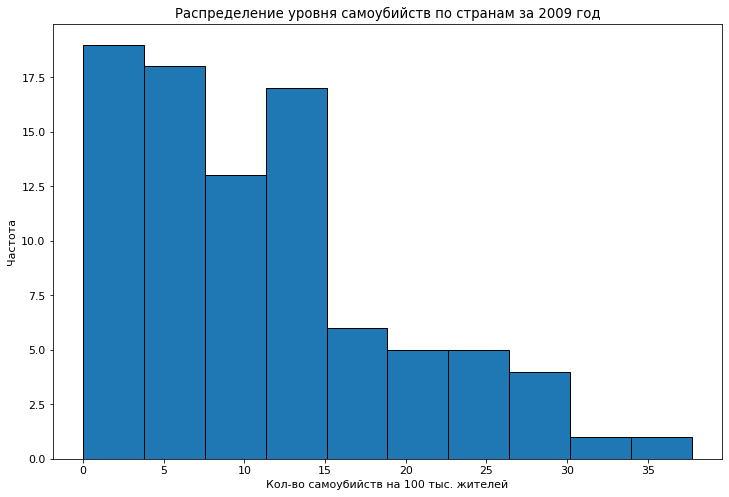

In [42]:
plt.hist(data_2009['suicides/100kpop'], bins=10, edgecolor='black')
plt.xlabel('Кол-во самоубийств на 100 тыс. жителей')
plt.ylabel('Частота')
plt.title('Распределение уровня самоубийств по странам за 2009 год')

In [43]:
# Страны с низким уровнем самоубийств:
data_2009[data_2009['suicides/100kpop'] < 6].index

Index(['Albania', 'Antigua and Barbuda', 'Armenia', 'Aruba', 'Bahamas',
       'Bahrain', 'Barbados', 'Belize', 'Brazil', 'Colombia', 'Cyprus', 'Fiji',
       'Georgia', 'Greece', 'Grenada', 'Guatemala', 'Jamaica', 'Kuwait',
       'Mexico', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Qatar',
       'Saint Vincent and Grenadines', 'Seychelles', 'South Africa', 'Turkey',
       'Turkmenistan', 'United Arab Emirates', 'Uzbekistan'],
      dtype='object', name='country')

In [44]:
# Страны с высоким уровнем самоубийств:
data_2009[data_2009['suicides/100kpop'] > 20].index

Index(['Belarus', 'Estonia', 'Finland', 'Guyana', 'Hungary', 'Japan',
       'Kazakhstan', 'Latvia', 'Lithuania', 'Republic of Korea',
       'Russian Federation', 'Slovenia', 'Suriname', 'Ukraine'],
      dtype='object', name='country')

Несмотря на выявленную корреляцию количества самоубийств с численностью и возрастной структурой населения, приходится констатировать, что в анализируемой выборке не достаточно параметров для выявления всех причин значимых различий в уровне самоубийств в разных странах. Группа стран с низкими показателями суицидов на 100 тыс. жителей разнородна по своему составу, так же как и группа с высокими показателями.

In [45]:
# Данные по РФ:
Russia_data = data[data['country'] == 'Russian Federation']
Russia_data = Russia_data.groupby(by='year').agg({'suicides_no': 'sum', 'population': 'sum'}).reset_index()
Russia_data['suicides/100kpop'] = Russia_data['suicides_no'] / Russia_data['population'] * 100_000

Text(0.5, 1.0, 'Динамика самоубийств в России')

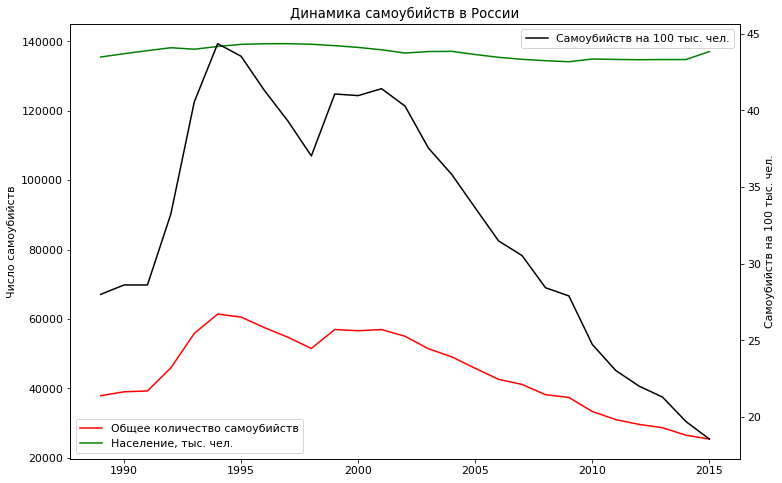

In [46]:
fig, ax  = plt.subplots()

ax1 = ax
ax2 = ax.twinx()

ax1.plot(Russia_data['year'], Russia_data['suicides_no'], color='red', label='Общее количество самоубийств')
ax1.plot(Russia_data['year'], Russia_data['population'] / 1000, color='green', label='Население, тыс. чел.')
ax2.plot(Russia_data['year'], Russia_data['suicides/100kpop'], color='black', label='Самоубийств на 100 тыс. чел.')
ax1.legend(loc='lower left')
ax2.legend(loc='upper right')
ax1.set_ylabel('Число самоубийств')
ax2.set_ylabel('Самоубийств на 100 тыс. чел.')
ax2.set_title('Динамика самоубийств в России')

In [47]:
Russia_data

,year,suicides_no,population,suicides/100kpop
0,1989,37921,135443800,27.997590
1,1990,39028,136398200,28.613281
2,1991,39281,137283000,28.613157
3,1992,45923,138118900,33.248889
4,1993,55846,137692800,40.558402
5,1994,61420,138476200,44.354192
6,1995,60548,139087100,43.532434
7,1996,57511,139272600,41.293837
8,1997,54746,139283200,39.305530
9,1998,51518,139122100,37.030781


На примере даннах по России наглядно видно, что в рассматриваемой выборке имеются статистические неточности, которые могут влиять на качество выводов, получаемых из анализа данных. Так, численность населения РФ, по официальным данным Росстата, в период с 1989 по 2015 год имела иную динамику, отличающуюся от представленной в выборке.
![image.png](image.png)

Можно предположить, что аналогичные неточности могут быть в данных и по другим странам, причем как по количеству самоубийств, так и по численности населения, а также в производных расчетных параметрах.